In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data and creat Dataframe for cleaning
original_tmdbmovies_df = pd.read_csv("tmdb.movies.csv")
tmdbmovies_df =original_tmdbmovies_df.copy()

In [3]:
#remove unname column of Dataframe

tmdbmovies_df=tmdbmovies_df.loc[:,~tmdbmovies_df.columns.str.contains('^Unname')]

In [6]:
tmdbmovies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
tmdbmovies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [4]:
#creating common column name on both DataFrame tmdb.movies.csv and tn.movie_budgets.csv
tmdbmovies_df['movies_name']=tmdbmovies_df['original_title']

In [5]:
# Read another data file and create data frame
original_moviebudget=pd.read_csv('tn.movie_budgets.csv')
moviebudget_df=original_moviebudget.copy()

In [10]:
moviebudget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [11]:
moviebudget_df['movie'].astype('str')

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5782, dtype: object

In [6]:
#check duplicate
moviebudget_df[moviebudget_df.duplicated(keep=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [7]:
#create movies_name column name as first Data Frame
moviebudget_df['movies_name']=moviebudget_df['movie']

In [14]:
moviebudget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
movies_name          5782 non-null object
dtypes: int64(1), object(6)
memory usage: 316.3+ KB


In [15]:
moviebudget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movies_name
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi


In [8]:
#merging two data frame tmdb.movies.csv and tn.movie_budgets.csv

merge_data=pd.merge(tmdbmovies_df,moviebudget_df,how='inner',on=['movies_name'])

In [17]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null object
domestic_gross       2316 non-null object
worldwide_gross      2316 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 307.6+ KB


In [17]:
merge_data.isnull().sum()

genre_ids            0
id_x                 0
original_language    0
original_title       0
popularity           0
release_date_x       0
title                0
vote_average         0
vote_count           0
movies_name          0
id_y                 0
release_date_y       0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [18]:
merge_data[merge_data.original_title == 'Toy Story 3']

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"


In [19]:
merge_data.corr(method='pearson')

,id_x,popularity,vote_average,vote_count,id_y
id_x,1.000000,-0.073920,0.012668,-0.128775,0.042502
popularity,-0.073920,1.000000,0.308586,0.732763,-0.036696
vote_average,0.012668,0.308586,1.000000,0.341520,0.003180
vote_count,-0.128775,0.732763,0.341520,1.000000,-0.027487
id_y,0.042502,-0.036696,0.003180,-0.027487,1.000000


In [20]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null object
domestic_gross       2316 non-null object
worldwide_gross      2316 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 307.6+ KB


In [9]:
def replace_all(df,column_name):
    df[column_name]=df[column_name].map(lambda x : x.replace(',','') if type(x) is str else x )
    df[column_name]=df[column_name].map(lambda x : x.replace('$','') if type(x) is str else x )
    return(df)

In [10]:
#replace '$'' and ',' sign from three column production_budget , domestic_gross and worldwide_gross
merge_data = replace_all(merge_data,'production_budget')
merge_data = replace_all(merge_data,'domestic_gross')
merge_data = replace_all(merge_data,'worldwide_gross')

In [24]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null object
domestic_gross       2316 non-null object
worldwide_gross      2316 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 307.6+ KB


In [11]:
#change datatype from object to int
merge_data['production_budget']=merge_data['production_budget'].astype(int)
merge_data['domestic_gross']=merge_data['domestic_gross'].astype(int)
merge_data['worldwide_gross']=merge_data['worldwide_gross'].astype(int)

In [21]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null int64
domestic_gross       2316 non-null int64
worldwide_gross      2316 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 307.6+ KB


In [22]:
#find duplicate data in merge_data frame
merge_data[merge_data.duplicated(keep=False)]

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,37,"Nov 22, 1995",Toy Story,30000000,191796233,364545516
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story,37,"Nov 22, 1995",Toy Story,30000000,191796233,364545516
10,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553,Toy Story 2,40,"Nov 19, 1999",Toy Story 2,90000000,245852179,511358276
11,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553,Toy Story 2,40,"Nov 19, 1999",Toy Story 2,90000000,245852179,511358276
141,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677,Blue Valentine,25,"Dec 29, 2010",Blue Valentine,1000000,9737892,16566240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,"[28, 35]",398177,en,Just Getting Started,8.459,2017-12-08,Just Getting Started,4.9,94,Just Getting Started,44,"Dec 8, 2017",Just Getting Started,22000000,6069605,6756412
2144,[18],392982,en,Marshall,7.879,2017-10-13,Marshall,7.3,257,Marshall,7,"Oct 13, 2017",Marshall,12000000,10051659,10116816
2145,[18],392982,en,Marshall,7.879,2017-10-13,Marshall,7.3,257,Marshall,7,"Oct 13, 2017",Marshall,12000000,10051659,10116816
2164,"[18, 14, 27, 10749]",437583,et,November,2.519,2018-02-23,November,7.6,38,November,81,"Jul 22, 2005",November,250000,191862,191862


In [12]:
#drop duplicate values
merge_data.drop_duplicates(keep='first',inplace=True)

In [13]:
merge_data[merge_data.duplicated(keep=False)]

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross


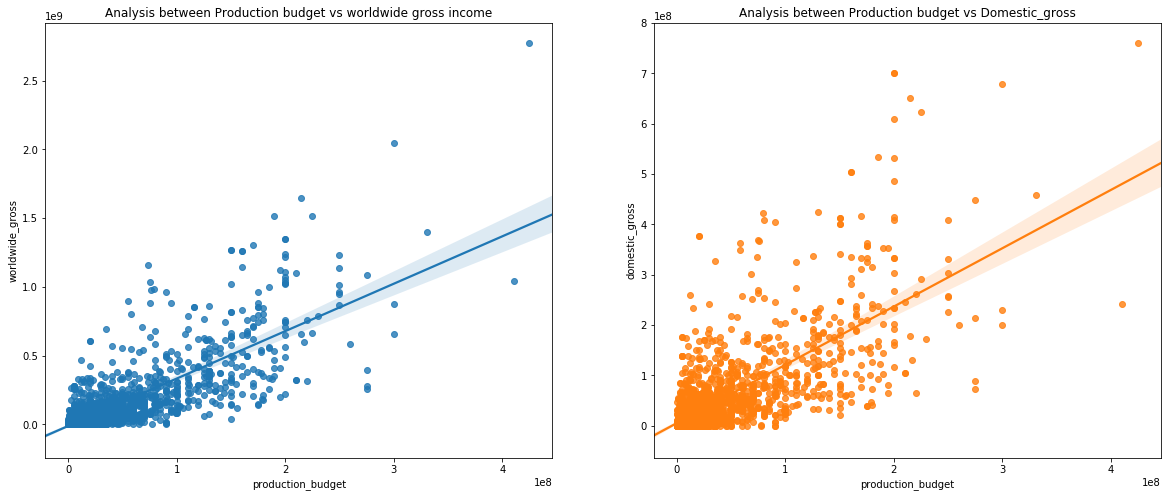

In [41]:
# create picture object 

fig =plt.figure(figsize=(20,8))
ax1= fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.title.set_text("Analysis between Production budget vs worldwide gross income")
ax2.title.set_text("Analysis between Production budget vs Domestic_gross")

#plot regression plot between production_budget and worldwide_gross
sns.regplot(x='production_budget',y='worldwide_gross',data=merge_data,ax=ax1)

#plot regression plot between production_budget and domestic_gross
sns.regplot(x='production_budget',y='domestic_gross',data=merge_data,ax=ax2)



Text(0.5, 1.0, 'Analysis between Production budget vs worldwide gross income with popularity')

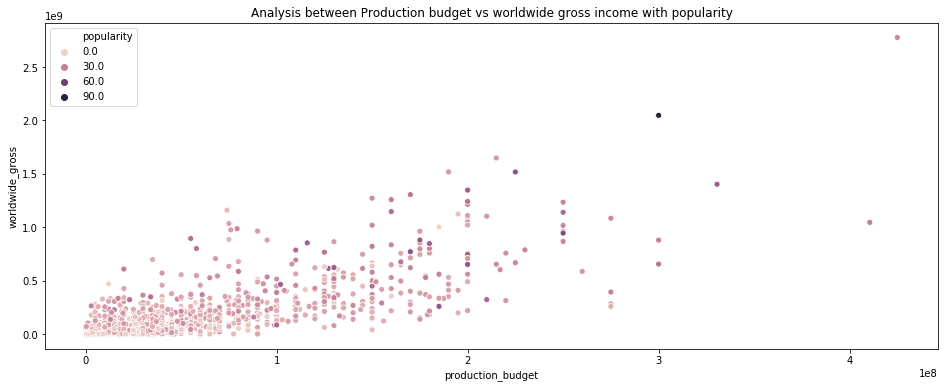

In [160]:
#plot scatterplot plot between production_budget and worldwide_gross and popularity
fig,ax = plt.subplots()
fig.set_size_inches(16,6)
sns.scatterplot(x='production_budget',y='worldwide_gross',hue='popularity',data=merge_data,ax=ax)
plt.title("Analysis between Production budget vs worldwide gross income with popularity")

Text(0.5, 1, 'correlation analysis between Production budget vs worldwide gross income')

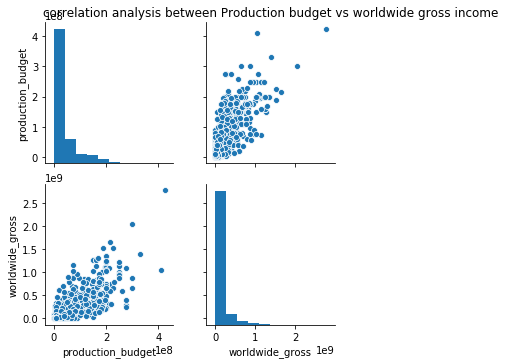

In [161]:
#fig,ax=plt.subplots()
#fig.set_size_inches(16,6)
sns.pairplot(merge_data,vars=['production_budget','worldwide_gross'])
plt.title("correlation analysis between Production budget vs worldwide gross income")

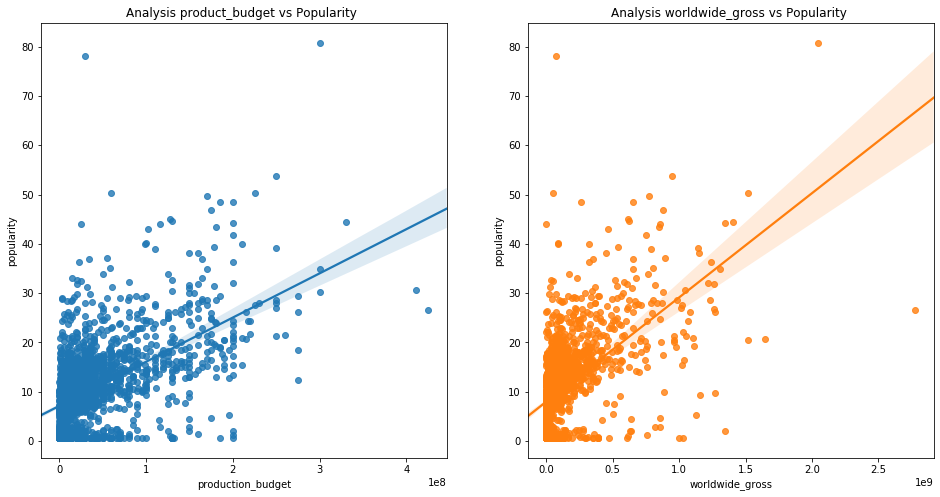

In [37]:
# create two subplot for analysis
fig = plt.figure(figsize=(16,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.title.set_text("Analysis product_budget vs Popularity ")
ax2.title.set_text("Analysis worldwide_gross vs Popularity ")

#plot regression plot between production_budget and Popularity
sns.regplot(x='production_budget',y='popularity',data=merge_data,ax=ax1)

#plot regression plot between production_budget and Popularity
sns.regplot(x='worldwide_gross',y='popularity',data=merge_data,ax=ax2)




In [ ]:
#create subset from merge_data for analysis movies popularity since 2015
data_subsetofmergerdata = merge_data[merge_data['release_date_x'] >='2015-01-01']

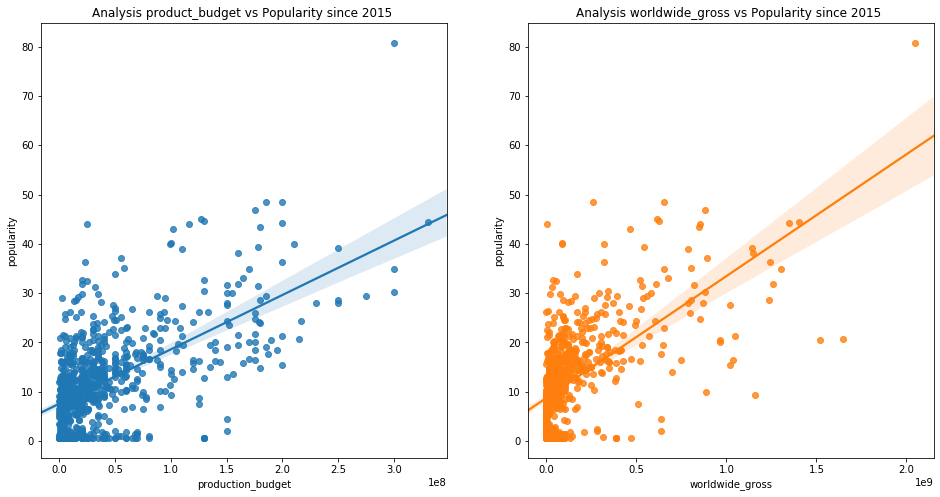

In [42]:
# create two subplot for analysis
fig = plt.figure(figsize=(16,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.title.set_text("Analysis product_budget vs Popularity since 2015 ")
ax2.title.set_text("Analysis worldwide_gross vs Popularity since 2015 ")

#reg plot between production_budget and popularity
sns.regplot(x='production_budget' , y ='popularity' ,data = data_subsetofmergerdata,ax=ax1 )

#reg plot between worldwide_gross and popularity
sns.regplot(x='worldwide_gross' , y ='popularity' ,data = data_subsetofmergerdata ,ax=ax2)

In [149]:
#create subset of 10 rows of merge_data
topten_movie_data=merge_data.sort_values('worldwide_gross',ascending=False).head(10)
topten_movie_data

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,Avatar,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2182,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Avengers: Infinity War,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
1478,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,Jurassic World,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
1483,"[28, 80, 53]",168259,en,Furious 7,20.396,2015-04-03,Furious 7,7.3,6538,Furious 7,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794
632,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,The Avengers,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897
1461,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,Avengers: Age of Ultron,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
568,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,Black Panther,7.4,12365,Black Panther,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224
567,"[28, 16]",86841,en,Black Panther,2.058,2011-01-18,Black Panther,5.1,11,Black Panther,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224
2192,"[28, 12, 878]",351286,en,Jurassic World: Fallen Kingdom,34.958,2018-06-22,Jurassic World: Fallen Kingdom,6.5,5995,Jurassic World: Fallen Kingdom,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799
118,[53],44363,en,Frozen,9.678,2010-02-05,Frozen,5.8,987,Frozen,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910


Text(0.5, 1.0, 'Analysis worldwide gross income vs indivisual movie and language')

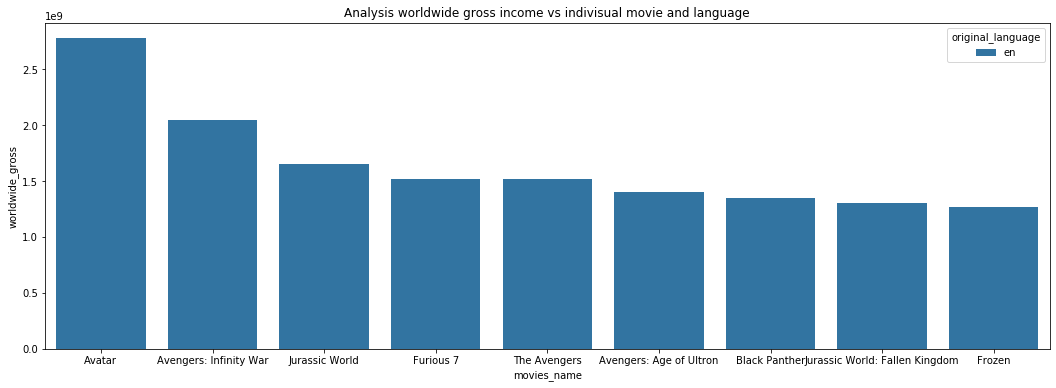

In [163]:
#display barplot top 10 movies with worldwide gross
fig,ax =plt.subplots()
fig.set_size_inches(18,6)

sns.barplot(x='movies_name',y='worldwide_gross',hue='original_language',data=topten_movie_data,ax=ax)
plt.title("Analysis worldwide gross income vs individual movie and language ")


In [104]:
#create dataset group by language
mergedata_groupbylang=merge_data.groupby('original_language').sum()
#mergedata_groupbylang['worldwide_gross']=mergedata_groupbylang['worldwide_gross'].astype(float)
mergedata_groupbylang['worldwide_gross']=mergedata_groupbylang['worldwide_gross']//1000000
#mergedata_groupbylang=mergedata_groupbylang[mergedata_groupbylang['worldwide_gross'] != 0]
mergedata_groupbylang

,id_x,popularity,vote_average,vote_count,id_y,production_budget,domestic_gross,worldwide_gross
original_language,,,,,,,,
ar,318074,11.192,15.6,168,110,3400000,530460,0
da,165878,24.897,15.1,3276,95,12850000,3718033,40
de,1009770,40.128,40.5,1284,252,104500000,80368854,221
en,426011051,22051.995,12731.8,3474086,105244,79659722196,104076019559,251514
es,2282508,65.840,78.2,2852,704,191500000,97757829,310
et,437583,2.519,7.6,38,81,250000,191862,0
fa,60421,2.860,6.9,45,41,900000,454121,0
fi,829250,15.845,12.2,135,129,5050000,10153,0
fr,3245002,111.820,114.9,4876,803,230150000,104458550,263


In [138]:
merge_data.sort_values('worldwide_gross',ascending=False).head()


,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,Avatar,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2182,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Avengers: Infinity War,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
1478,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,Jurassic World,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
1483,"[28, 80, 53]",168259,en,Furious 7,20.396,2015-04-03,Furious 7,7.3,6538,Furious 7,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794
632,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,The Avengers,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897


Text(0.5, 1.0, 'Analysis outlier data in worldwide gross data ')

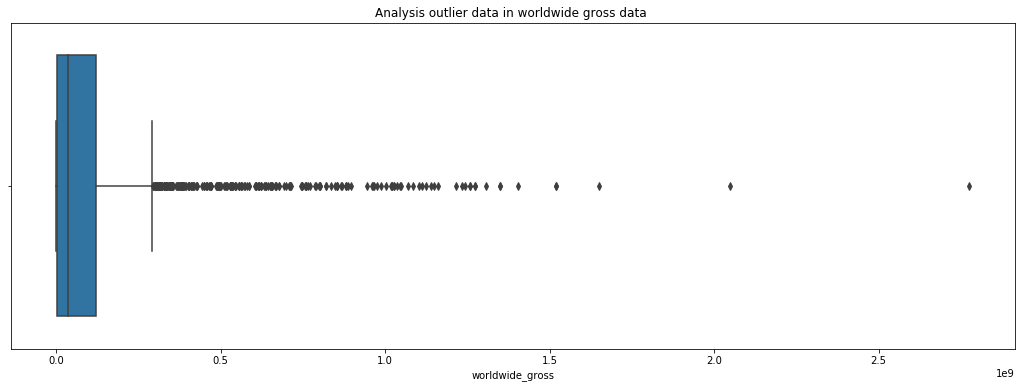

In [164]:
#find outlier for analysis langauge vs worldwide_grossv in merge_data
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
sns.boxplot('worldwide_gross', data = merge_data)
plt.title("Analysis outlier data in worldwide gross data ")



In [144]:
#fucntion to remove outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

Text(0.5, 1.0, 'Analysis outlier data  after use outlier removal funn in worldwide gross data ')

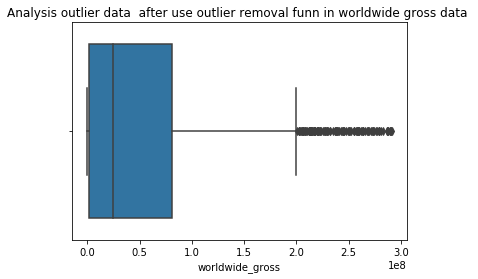

In [165]:
# Remove outlier data
data_nooutlier=remove_outlier(merge_data,'worldwide_gross')
data_nooutlier
sns.boxplot('worldwide_gross',data=data_nooutlier)
plt.title("Analysis outlier data  after use outlier removal funn in worldwide gross data ")


#mergerdata_withoutoutlier=merge_data[merge_data.between(merge_data.quantile(0.25),merge_data.quantile(0.75))] # remove outlier data

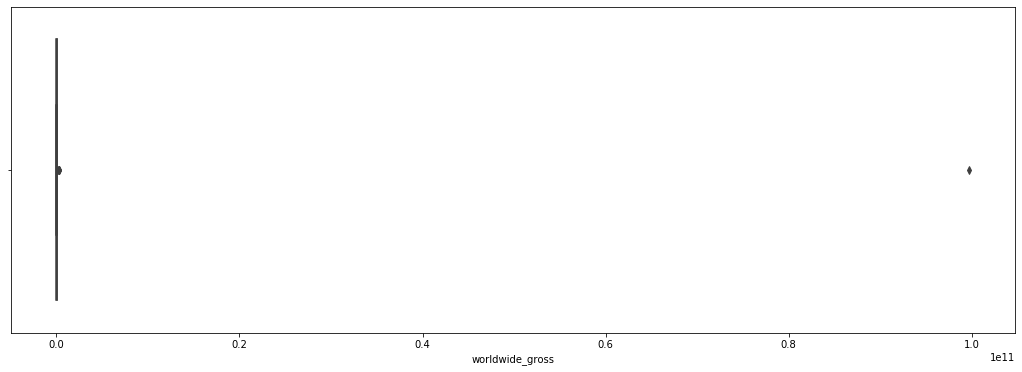

In [130]:
data_groupbylan_nooutlier=data_nooutlier.groupby('original_language').sum()
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
sns.boxplot('worldwide_gross',data = data_groupbylan_nooutlier)

Text(0.5, 1.0, 'Analysis language vs worldwide_gross without outlier worldwide data')

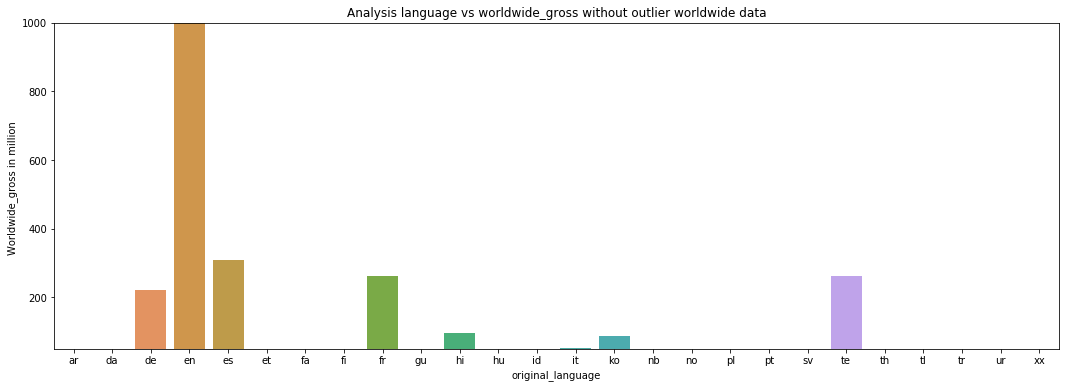

In [157]:
data_groupbylan_nooutlier=data_nooutlier.groupby('original_language').sum()
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
ax=sns.barplot(x=data_groupbylan_nooutlier.index,y= data_groupbylan_nooutlier['worldwide_gross']//1000000
               ,data =data_groupbylan_nooutlier)
ax.set(ylabel="Worldwide_gross in million ")
ax.set(ylim=(50,1000))
plt.title("Analysis language vs worldwide_gross without outlier worldwide data")

Text(0.5, 1.0, 'Analysis barplot language vs worldwide_gross with outlier worldwide_gross data')

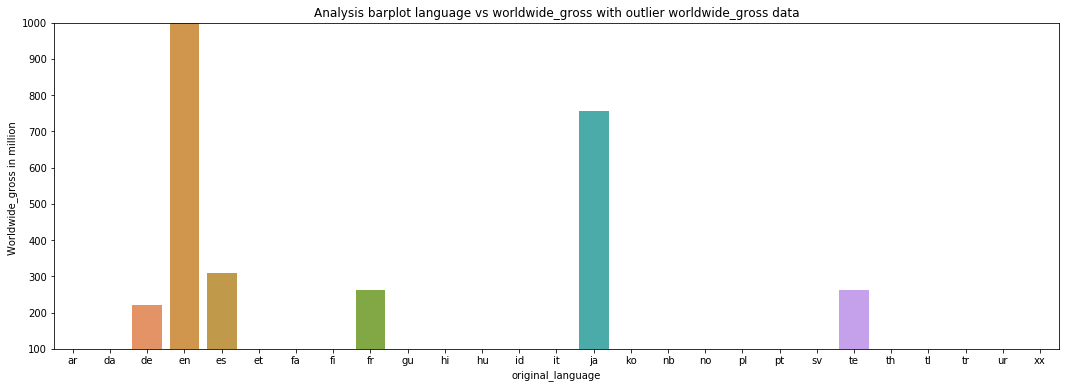

In [158]:
#barplot between original_lang and worldwide_gross without remove outlier in marge_data
mergedata_groupbylang=merge_data.groupby('original_language').sum()
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
ax=sns.barplot(x=mergedata_groupbylang.index,y= mergedata_groupbylang['worldwide_gross']//1000000
            ,data =mergedata_groupbylang)
ax.set(ylabel="Worldwide_gross in million ")
ax.set(ylim=(100,1000))
plt.title("Analysis barplot language vs worldwide_gross with outlier worldwide_gross data")

#fig.text(100,500,"en")

Text(0.5, 1.0, 'Analysis barplot language vs Popularity ')

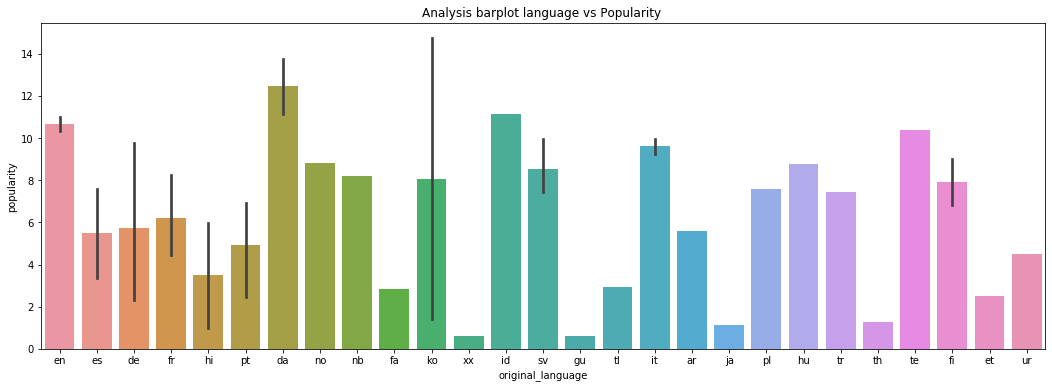

In [156]:
#plot barplot between original_lang and popularity
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
sns.barplot(x='original_language',y='popularity' ,data =merge_data)
plt.title("Analysis barplot language vs Popularity ")

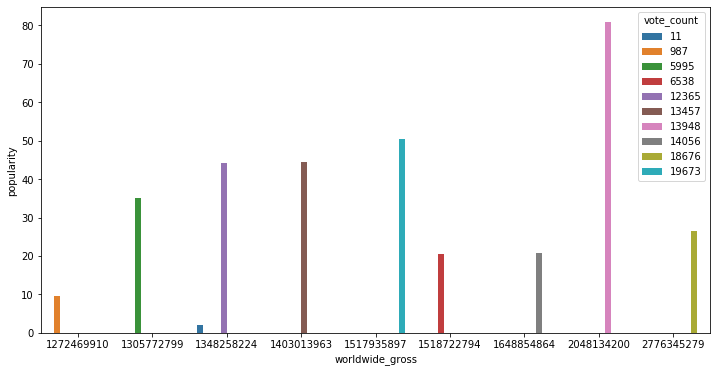

In [86]:
# plot barplot worldwide_gross vs popularity and vote_count
fig,ax=plt.subplots()
fig.set_size_inches(12,6)
subset_data=merge_data.sort_values('worldwide_gross',ascending=False).head(10)
subset_data
sns.barplot(x='worldwide_gross',y='popularity',hue='vote_count',data=subset_data)

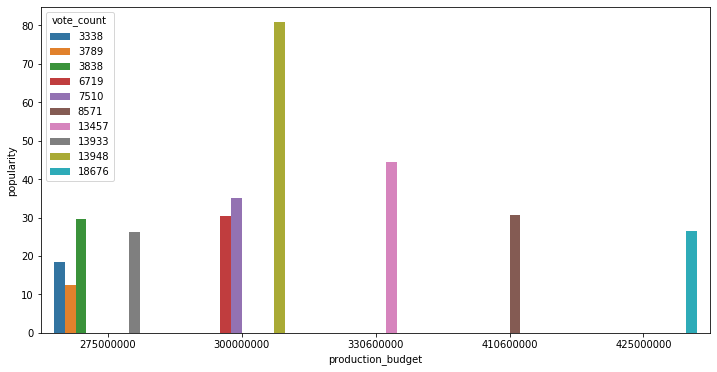

In [88]:
# plot barplot for production_budget vs popularity and vote_count
fig,ax=plt.subplots()
fig.set_size_inches(12,6)
subset_data=merge_data.sort_values('production_budget',ascending=False).head(10)
subset_data
sns.barplot(x='production_budget',y='popularity',hue='vote_count',data=subset_data)

In [22]:
merge_data[merge_data.release_date_x >='2015-01-01'].count()

genre_ids            838
id_x                 838
original_language    838
original_title       838
popularity           838
release_date_x       838
title                838
vote_average         838
vote_count           838
movies_name          838
id_y                 838
release_date_y       838
movie                838
production_budget    838
domestic_gross       838
worldwide_gross      838
dtype: int64

In [23]:
merge_data[merge_data.release_date_x < '2015-01-01'].count()

genre_ids            1306
id_x                 1306
original_language    1306
original_title       1306
popularity           1306
release_date_x       1306
title                1306
vote_average         1306
vote_count           1306
movies_name          1306
id_y                 1306
release_date_y       1306
movie                1306
production_budget    1306
domestic_gross       1306
worldwide_gross      1306
dtype: int64

In [24]:
merge_data.count()

genre_ids            2144
id_x                 2144
original_language    2144
original_title       2144
popularity           2144
release_date_x       2144
title                2144
vote_average         2144
vote_count           2144
movies_name          2144
id_y                 2144
release_date_y       2144
movie                2144
production_budget    2144
domestic_gross       2144
worldwide_gross      2144
dtype: int64

In [25]:
#
data_subsetofmergerdata = merge_data[merge_data['release_date_x'] >='2015-01-01']
data_subsetofmergerdata.release_date_x.value_counts()


2015-10-16    10
2015-11-20     9
2015-08-07     8
2015-03-27     8
2015-10-23     8
              ..
2017-12-29     1
2018-05-25     1
2018-05-10     1
2016-04-08     1
2016-01-01     1
Name: release_date_x, Length: 358, dtype: int64